### Importing necessary libraries and data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Brief explanation of the libraries used in the code
- `pandas`: Data manipulation and analysis library.
- `numpy`: Numerical computing library for handling arrays and mathematical operations.
- `matplotlib.pyplot`: Plotting library for creating visualizations.
- `seaborn`: Statistical data visualization library built on top of matplotlib.
- `sklearn`: spliting training and test data only (Not used for model)

In [ ]:
# Load the dataset
#data = pd.read_csv("parkinsons_updrs.csv")
data = pd.read_csv("https://cdn.jsdelivr.net/gh/UnknownSilence/Linear-Regression-using-Gradient-Descent@main/parkinsons_updrs.csv")

In [ ]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


### ABOUT DATASET:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor UPDRS scores ('motor_UPDRS') from the 16 voice measures.

#### ATTRIBUTE INFORMATION:

- subject# - Integer that uniquely identifies each subject
- age - Subject age
- sex - Subject gender '0' - male, '1' - female
- test_time - Time since recruitment into the trial. The integer part is the
- number of days since recruitment.
- motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
- total_UPDRS - Clinician's total UPDRS score, linearly interpolated
- Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of
- variation in fundamental frequency
- Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA -
- Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE - A nonlinear dynamical complexity measure
- DFA - Signal fractal scaling exponent
- PPE - A nonlinear measure of fundamental frequency variation


### Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking the Description of Numerical Columns of Data
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000034,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
# Observing the Number of Rows and column of data
print('No of Rows in data are:', data.shape[0])
print('No of Columns in data are:', data.shape[1])

No of Rows in data are: 5875
No of Columns in data are: 22


In [ ]:
# Checking the missing Data
data.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

<b> Since there is no missing value in any feature therefore there will be no missing value treatment

In [ ]:
# Check for duplicate values
duplicates = data.duplicated().sum()

# Display the duplicate values
print("Duplicate values:")
print(duplicates)

Duplicate values:
0


<b> In this dataset, there are no categorical variables so there is no need of encoding </b>
    
### Correlation Matrix

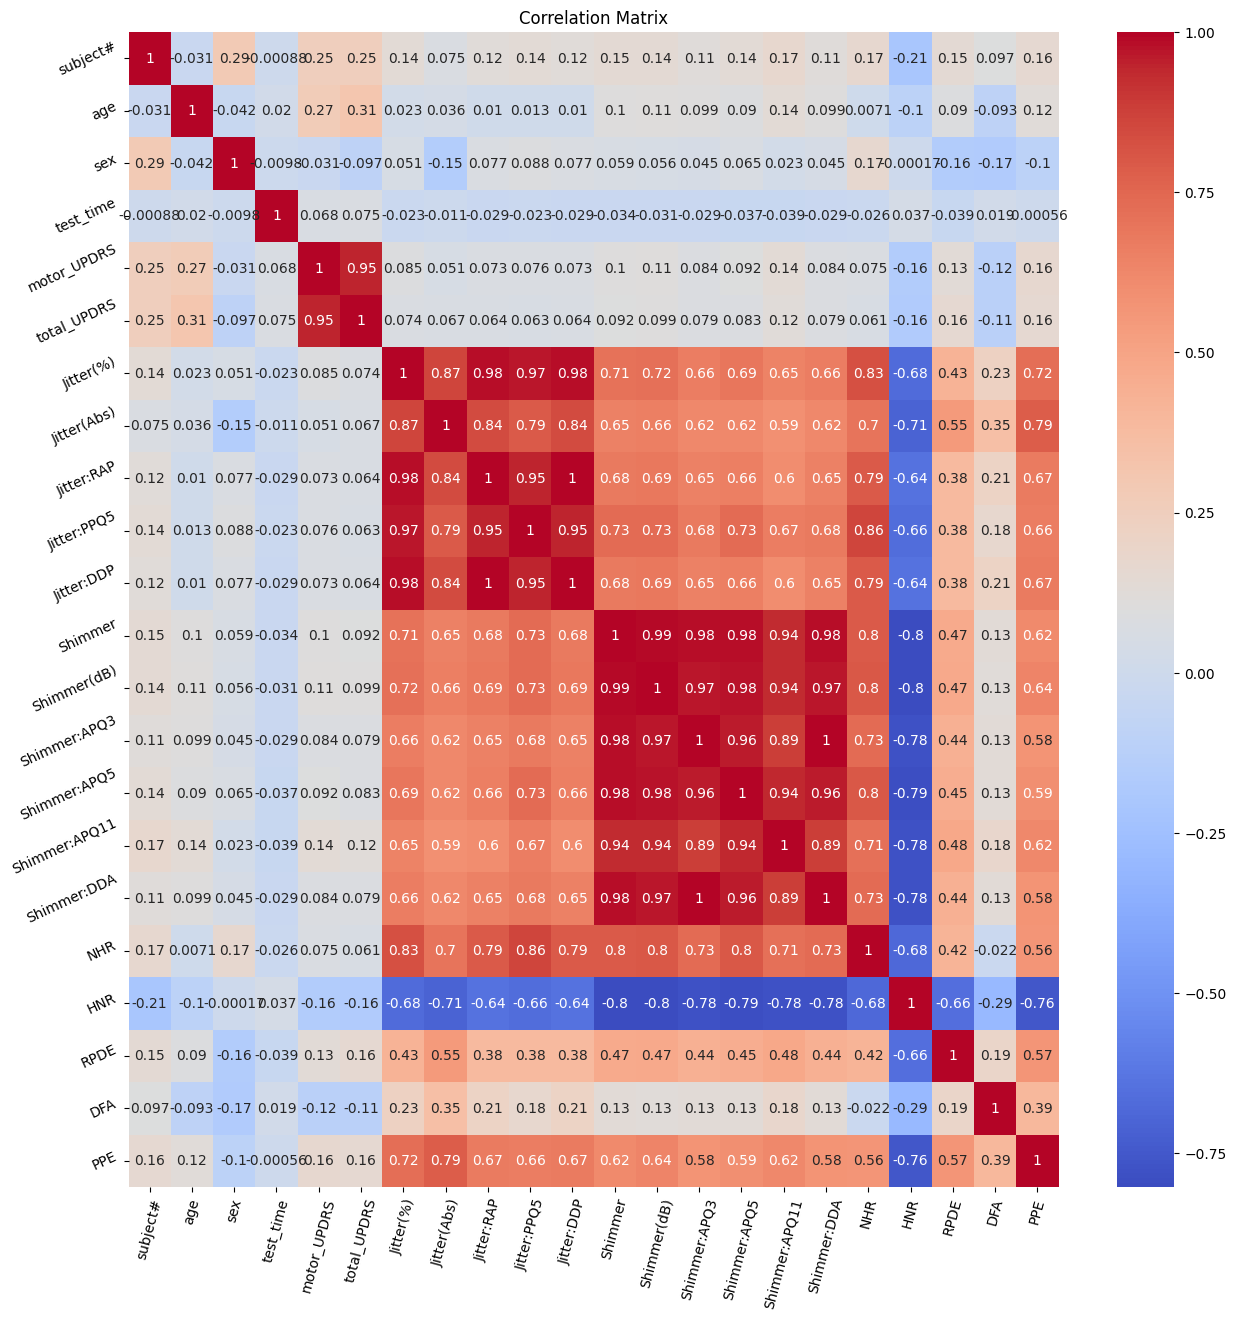

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation=75)
plt.yticks(rotation=25)
plt.show()

### Preparing data for modeling

In [ ]:
# Select relevant features and target
X = data[['age', 'sex', 'test_time', 'Jitter(%)', 'Shimmer', 'NHR', 'RPDE', 'DFA', 'PPE']]
y = data['motor_UPDRS']

### Split the dataset into training and test sets

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implement Gradient Descent for Linear Regression

In [ ]:
# Implement Gradient Descent for Linear Regression
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    mse_log = []

    for _ in range(num_iterations):
        # Compute predictions
        predictions = np.dot(X, weights)

        # Compute the error
        error = predictions - y

        # Compute the gradient
        gradient = np.dot(X.T, error) / num_samples

        # Update the weights
        weights -= learning_rate * gradient

        # Compute the Mean Squared Error (MSE)
        mse = np.mean((error ** 2))
        mse_log.append(mse)

    return weights, mse_log

### Tune hyperparameters

In [ ]:
# Tune hyperparameters (learning rate and num_iterations)
learning_rates = [0.0001, 0.001, 0.01]
num_iterations_list = [1, 5, 7, 10, 30, 50, 100]

best_mse = float('inf')
best_learning_rate = None
best_num_iterations = None
best_weights = None
best_r2 = None

In [ ]:
results = []
from sklearn.metrics import r2_score
for learning_rate in learning_rates:
    for num_iterations in num_iterations_list:
        weights, mse_log = gradient_descent(X_train, y_train, learning_rate, num_iterations)
        test_mse = np.mean((np.dot(X_test, weights) - y_test) ** 2)
        #r2 = calculate_r2(y_test, y_pred)
        r2 = r2_score(y_test, np.dot(X_test, weights))

        results.append({
            'Learning Rate': learning_rate,
            'Num Iterations': num_iterations,
            'Weight' : weights,
            'MSE': test_mse,
            'R2': r2
        })

        if test_mse < best_mse:
            best_mse = test_mse
            best_learning_rate = learning_rate
            best_num_iterations = num_iterations
            best_weights = weights
            best_r2 = r2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


### Creating a Log to store MSE values with there respective parameters

In [ ]:
# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Learning Rate,Num Iterations,Weight,MSE,R2
0,0.0001,1,"[0.14012127502765953, 0.0006635547446808512, 0...",2.056758e+02,-2.222283e+00
1,0.0001,5,"[0.16649588431477333, 0.0007574964146715055, 0...",8.341074e+01,-3.067797e-01
2,0.0001,7,"[0.18898406367333706, 0.0008530332139407732, 0...",7.582253e+01,-1.878967e-01
3,0.0001,10,"[0.21748901629909695, 0.0009748694882179418, 0...",6.891365e+01,-7.965661e-02
4,0.0001,30,"[0.2963289295051175, 0.0013108345099538947, 0....",6.007677e+01,5.878893e-02
5,0.0001,50,"[0.3094576691650496, 0.0013640098862012055, 0....",5.997322e+01,6.041133e-02
6,0.0001,100,"[0.3120487286814344, 0.0013668789956944065, 0....",5.999885e+01,6.000974e-02
7,0.0010,1,"[1.4012127502765952, 0.006635547446808512, 2.0...",7.692886e+04,-1.204229e+03
8,0.0010,5,"[42278.016218910256, 203.2850750931117, 74723....",1.089166e+14,-1.706374e+12
9,0.0010,7,"[8205758.223431427, 39455.71122726859, 1450322...",4.103066e+18,-6.428193e+16


### Best Parameters

In [ ]:
print("Weight Coefficients:", best_weights)
print("\nBest Learning Rate:", best_learning_rate)
print("Best Number of Iterations:", best_num_iterations)
print("Test Dataset MSE:", best_mse)
print("R-squared (R2) Score:", best_r2)

Weight Coefficients: [3.09457669e-01 1.36400989e-03 1.28384075e-02 4.74340064e-05
 2.39676529e-04 3.45270016e-04 3.07024174e-03 2.82532332e-03
 1.52716342e-03]

Best Learning Rate: 0.0001
Best Number of Iterations: 50
Test Dataset MSE: 59.97321723973133
R-squared (R2) Score: 0.060411333276964685


### Are you satisfied that you have found the best solution?

In general, a lower MSE indicates a better fit of the model to the data. The R^2 score is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1.
    
Based on the results:
- Best Learning Rate: 0.0001
- Best Number of Iterations: 50
- Test Dataset MSE: 59.97
- R-squared (R2) Score: 0.0604
In this case, the R^2 score is relatively low.

The model's performance on the test dataset, as measured by the Mean Squared Error (MSE), is satisfactory. The MSE of 59.97 suggests that the model is properly fitting the data.